In [2]:
%matplotlib inline
from qiskit import *
provider = IBMQ.load_account()

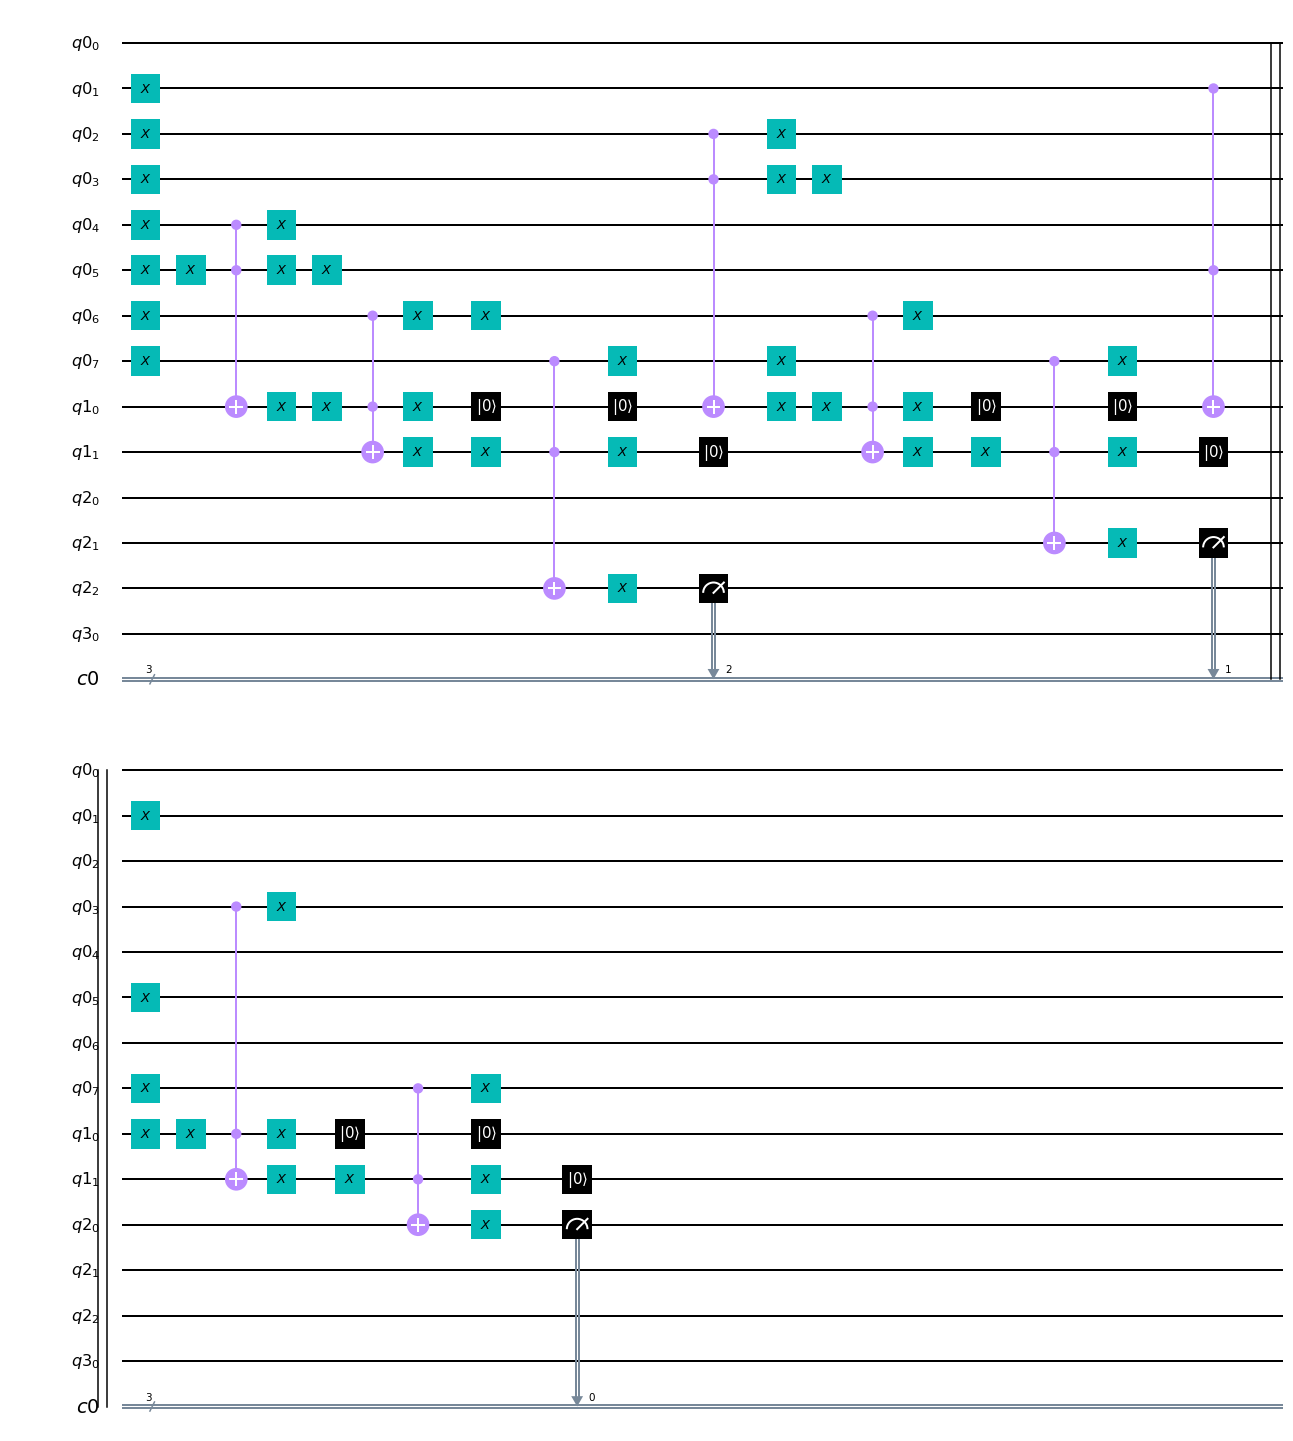

In [3]:
simulator = Aer.get_backend('qasm_simulator')
qi=QuantumRegister(8)
qb=QuantumRegister(2)
qo=QuantumRegister(3)
v=QuantumRegister(1)
c=ClassicalRegister(3)
circuit = QuantumCircuit(qi,qb,qo,v,c)
circuit.x(qi[5])
or4(circuit,qi[4],qi[5],qi[6],qi[7],qb[0],qb[1],qo[2])
or4(circuit,qi[2],qi[3],qi[6],qi[7],qb[0],qb[1],qo[1])
or4(circuit,qi[1],qi[5],qi[3],qi[7],qb[0],qb[1],qo[0])
circuit.measure(qo[2],c[2])
circuit.measure(qo[1],c[1])
circuit.measure(qo[0],c[0])
circuit.draw()

{'101': 8192}


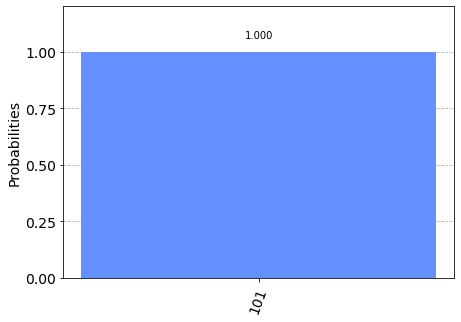

In [64]:
job = execute(circuit,simulator,shots = 8192)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

In [ ]:
def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)
def or3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)
def or4(qc,q0,q1,q2,q3,b1,b2,q4):
    or3(qc,q0,q1,q2,b1,b2)
    fun_or(qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)